# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [158]:
import numpy as np
import pandas as pd
import matplotlib

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [159]:
df = pd.read_csv('/Users/jamesli/Desktop/ds/data/states_edu.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [160]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [161]:
df['YEAR'].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [75]:
mich = df[df['STATE'] == 'MICHIGAN']
cleaned_mich = mich.dropna(subset=['AVG_MATH_4_SCORE'])
cleaned_mich['AVG_MATH_4_SCORE'].mean()


234.36363636363637

In [76]:
ohio = df[df['STATE'] == 'OHIO']
cleaned_ohio = ohio.dropna(subset=['AVG_MATH_4_SCORE'])
cleaned_ohio['AVG_MATH_4_SCORE'].mean()

239.45454545454547

In [ ]:
# Ohio has a higher average across all years as 239.45454545454547 is greater than 234.36363636363637

Find the average for your chosen test across all states in 2019

In [77]:
df_2019 = df[df['YEAR'] == 2019]
math_4_avg_2019 = df_2019['AVG_MATH_4_SCORE'].mean()
math_4_avg_2019

239.9433962264151

For each state, find a maximum value for your chosen test score

In [78]:
max_math_4_score_by_state = df.loc[df.groupby('STATE')['AVG_MATH_4_SCORE'].idxmax(), ['STATE', 'YEAR', 'AVG_MATH_4_SCORE']]
max_math_4_score_by_state

,STATE,YEAR,AVG_MATH_4_SCORE
1071,ALABAMA,2013,233.0
766,ALASKA,2007,237.0
1073,ARIZONA,2013,240.0
1074,ARKANSAS,2013,240.0
1666,CALIFORNIA,2019,235.0
1076,COLORADO,2013,247.0
873,CONNECTICUT,2009,245.0
1078,DELAWARE,2013,243.0
1670,DISTRICT_OF_COLUMBIA,2019,235.0
1671,DODEA,2019,250.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [137]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT_4TH'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_4']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT_4TH'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_4']

In [162]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,122487.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [174]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',
       'INSTRUCTION_EXPENDITURE_PER_STUDENT',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT_4TH',
       'INSTRUCTION_EXPENDITURE_PER_STUDENT_4TH',
       'SUPPORT_SERVICES_EXPENDITURE_BINNED', 'ENROLL_ALL_BINNED'],
      dtype='object')

In [173]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT_4TH'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_4']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT_4TH'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_4']
df['SUPPORT_SERVICES_EXPENDITURE_BINNED'] = pd.cut(df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'], bins=3, labels=['Low', 'Medium', 'High'])

df['ENROLL_ALL_BINNED'] = pd.cut(df['ENROLL_ALL'], bins=3, labels=['Small', 'Medium', 'Large'])

In [202]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',
       'INSTRUCTION_EXPENDITURE_PER_STUDENT',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT_4TH',
       'INSTRUCTION_EXPENDITURE_PER_STUDENT_4TH',
       'SUPPORT_SERVICES_EXPENDITURE_BINNED', 'ENROLL_ALL_BINNED'],
      dtype='object')

<Axes: title={'center': 'Distribution of 4th Grade MATH Scores'}, ylabel='Frequency'>

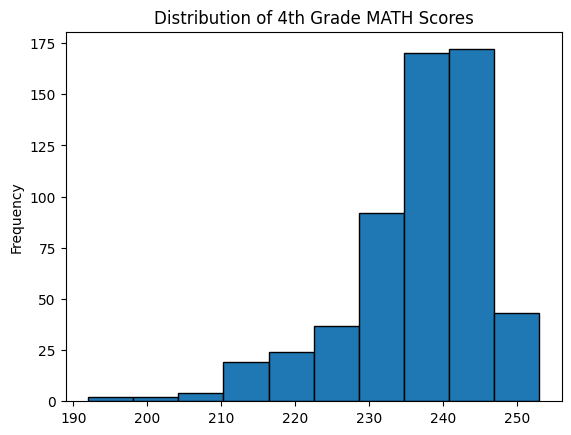

In [164]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade MATH Scores", edgecolor="black")

Text(0, 0.5, '4th Grade Math Score')

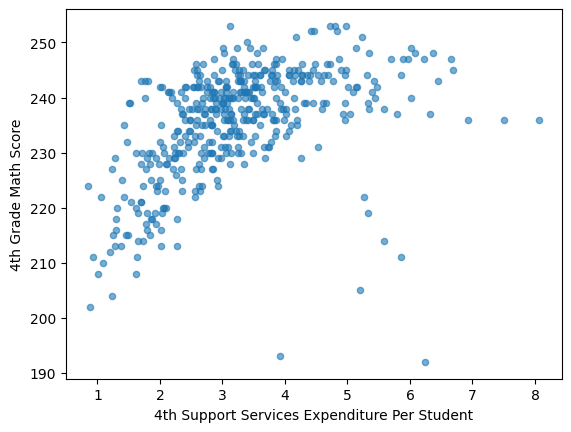

In [205]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Support Services Expenditure Per Student')
plt.ylabel('4th Grade Math Score')

Text(0, 0.5, '4th Grade Math Score')

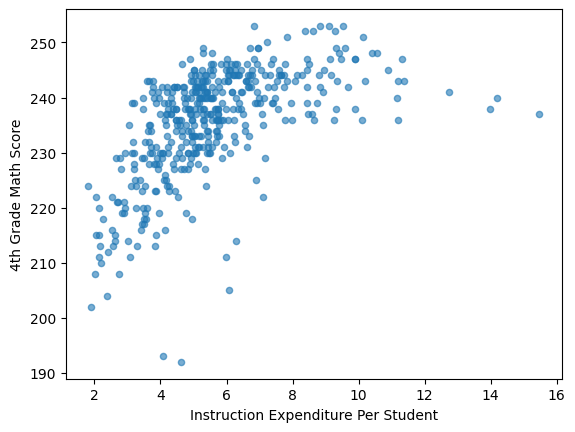

In [204]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure Per Student')
plt.ylabel('4th Grade Math Score')

In [66]:
# AVG_4_READING_SCORE: There's a strong upward linear relationship.
# AvG_8_MATH_SCORE: There's a strong upward linear relationship.
# INSTRUCTION_EXPENDITURE_Per_Student: Although not a perfect linear relationship, there is still an upward trend.
# SUPPORT_SERVICES_EXPENDITURE_Per_Student: Although not a perfect linear relationship, there is still an upward trend.

Feature engineering justification: I made comments in the above cell.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

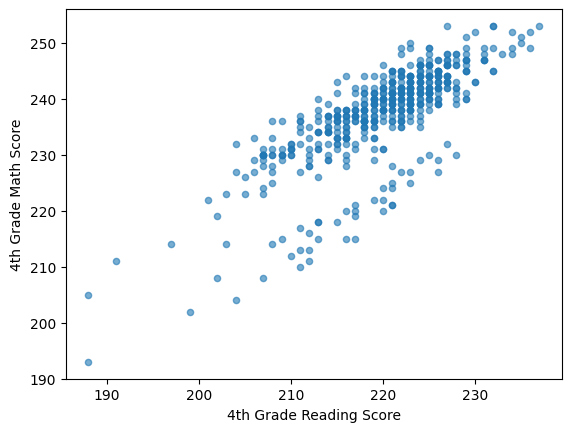

In [206]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Reading Score')
plt.ylabel('4th Grade Math Score')

4th grading average math scores based on their reading scores

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

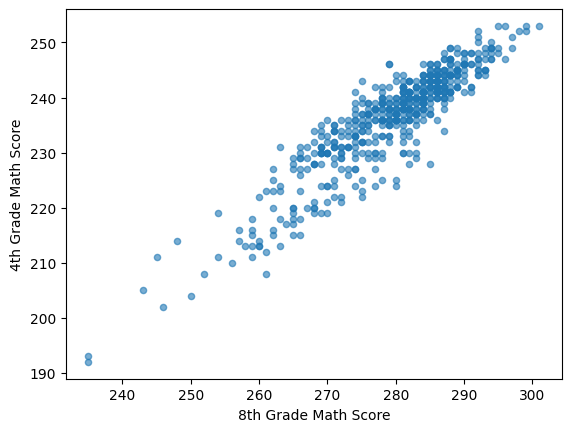

In [213]:
df.plot.scatter(x='AVG_MATH_8_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('8th Grade Math Score')
plt.ylabel('4th Grade Math Score')

4th grading average math scores based on 8th grade math scores

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [218]:
from sklearn.model_selection import train_test_split

In [236]:
X = df[['AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'INSTRUCTION_EXPENDITURE_PER_STUDENT', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']

In [237]:
y.fillna(y.median(), inplace=True)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [239]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [240]:
model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

In [241]:
model.fit(X_train, y_train)

LinearRegression()

In [242]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [243]:
print(model.intercept_)
print(model.coef_)


110.27867652445997
[ 0.5379682   0.13151515  0.08163915 -0.52384695]


In [244]:
model.score(X_test, y_test)

0.7268353230223494

In [245]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.27774718429241074

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

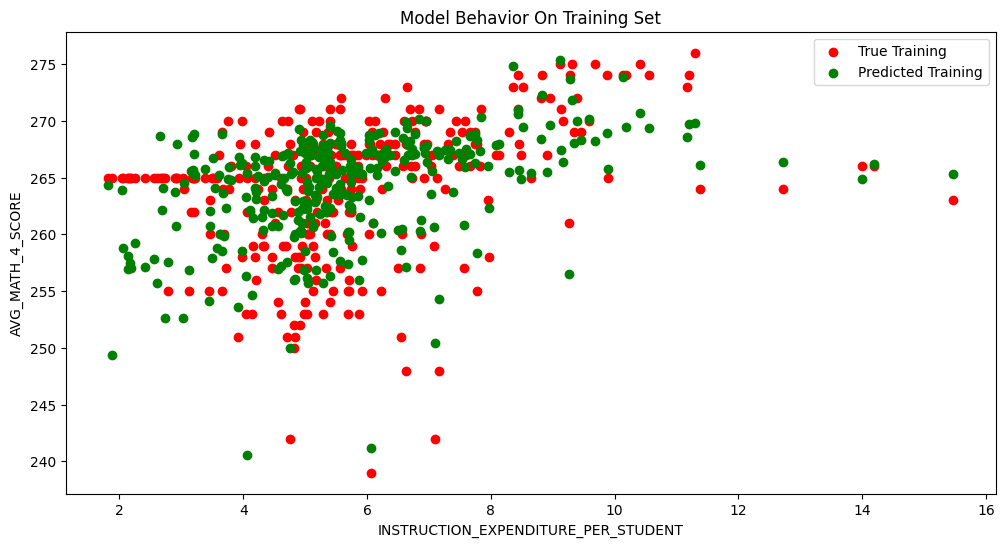

In [247]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color="red")  
plt.scatter(X_train[col_name], model.predict(X_train), color="green") 

# Add a legend to distinguish between true and predicted values
plt.legend(['True Training', 'Predicted Training'])

# Set labels and title for the plot
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')  # Target variable name
plt.title("Model Behavior On Training Set")

plt.show()

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")